In [1]:
import os

In [42]:
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL.ImageOps  

In [10]:
Y6A1_COADD_DIR = "/pscratch/sd/s/smau/Y6A1_COADD"
Y6A1_COADD_FIDUCIAL_DIR = "/pscratch/sd/s/smau/Y6A1_COADD_fiducial"
MASK_DIR = "/pscratch/sd/s/smau/fiducial_masks"

In [4]:
SIZE = (1000, 1000)

In [5]:
with open("args-y6.txt", "r") as fp:
    for i, line in enumerate(fp):
        if i < 525:
            tilename = line.split(" ")[0]
        else:
            break

In [6]:
_real_image = os.path.join(
    Y6A1_COADD_DIR,
    f"{tilename}-gri.jpg",
)

In [7]:
_sim_image = os.path.join(
    Y6A1_COADD_FIDUCIAL_DIR,
    f"{tilename}-coadd-gri.jpg",
)

In [18]:
_mask = os.path.join(
    MASK_DIR,
    f"{tilename}_metadetect-config_mdetcat_part0000-mask.fits.fz",
)

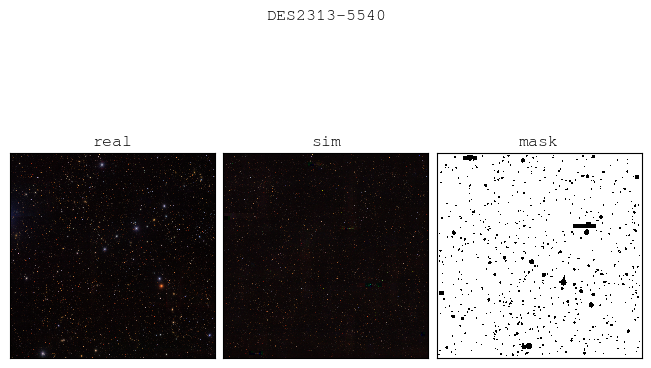

In [55]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)

with (
    Image.open(_real_image) as real_image,
    Image.open(_sim_image) as sim_image
):
    real_image.thumbnail(SIZE)
    sim_image.thumbnail(SIZE)

with fitsio.FITS(_mask_image) as fits:
    mask = fits[1].read()

# im = Image.fromarray(mask)
# im = Image.fromarray(np.arcsinh(mask))
im = Image.fromarray(mask > 1)
im.thumbnail(SIZE)
im_l = im.convert("L")
im_inv = PIL.ImageOps.invert(im_l)

axs[0].imshow(real_image)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("real")

axs[1].imshow(sim_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("sim")

axs[2].imshow(im_inv, cmap="gray")
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title("mask")

fig.suptitle(tilename)

plt.show()